In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score
import time

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# What's the baseline accuracy?
df.Class.value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Since the dataset is 99.83% class 0, the baseline accuracy is 0.9983 (in effect if the models predict all of the observations to be of class 0 then it will get an accuracy score 0f 0.9983.  It also means that we'll be working quite hard for small marginal improvements to make the models effective

In [6]:
df.groupby('Class')['Amount'].mean()

Class
0     88.291022
1    122.211321
Name: Amount, dtype: float64

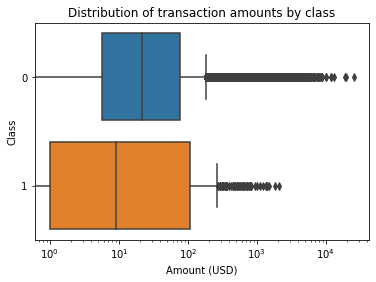

In [7]:
ax = sns.boxplot(data=df, x = 'Amount', y = 'Class', orient="h")
ax.set(title = "Distribution of transaction amounts by class", xlabel = "Amount (USD)", ylabel = 'Class')
ax.set_xscale("log");

In [8]:
df.groupby('Class')['Amount'].min()

Class
0    0.0
1    0.0
Name: Amount, dtype: float64

In [9]:
df.groupby('Class')['Amount'].max()

Class
0    25691.16
1     2125.87
Name: Amount, dtype: float64

In [10]:
df.groupby('Class')['Amount'].median()

Class
0    22.00
1     9.25
Name: Amount, dtype: float64

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
X = df.iloc[:,0:30]
y = df.iloc[:,-1]

In [13]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(227845, 30) (227845,)
(56962, 30) (56962,)


In [16]:
scaler = StandardScaler()

X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
148894,90296.0,-0.614670,0.667191,-0.807046,-1.345089,2.093272,-0.244268,1.040037,-0.189512,1.105336,...,-0.351196,-0.345495,-0.690278,0.443984,-0.508205,-1.084442,-0.252261,-0.100874,0.311842,-0.311627
149331,91034.0,-0.251163,1.223851,-0.006040,-0.651568,1.486648,-0.721204,1.490755,-0.340784,0.022848,...,-0.136138,0.071237,0.409649,-0.337094,0.764062,0.140977,0.294995,0.009465,0.119201,-0.326050
164755,116966.0,1.621797,-0.677173,-1.943449,0.443123,-0.018469,-0.718087,0.223660,-0.124213,0.893354,...,0.188849,-0.109453,-0.571174,-0.039053,-0.533907,-0.142520,-0.102380,-0.053695,-0.002554,0.466386
80320,58432.0,1.208963,-0.164911,-0.762305,0.012764,0.642106,0.566327,0.077243,0.144293,-0.027635,...,-0.035352,-0.077214,-0.384561,-0.286030,-1.701549,0.598367,0.625142,-0.072340,-0.019914,-0.096222
28430,35006.0,-1.434929,-1.587870,1.039760,-1.212899,0.872839,-2.155917,-0.081731,-0.229774,-0.871903,...,0.134804,-0.271771,-0.751199,0.438227,0.332335,-0.420248,0.784341,0.033105,0.006413,-0.004956


In [62]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
print("accuracy score on train data :", lr.score(X_train, y_train))
print("cross val scores on train data :", cross_val_score(lr, X_train, y_train, cv = 5))
print("mean cross val score :", cross_val_score(lr, X_train, y_train, cv = 5).mean())
print("accuracy score on test data :", lr.score(X_test, y_test))

accuracy score on train data : 0.9992187671443306
cross val scores on train data : [0.99923193 0.99920999 0.99925388 0.99914416 0.99907832]
mean cross val score : 0.9991836555553117
accuracy score on test data : 0.9992802219023208


In [63]:
lr_pred = lr.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.66      0.76        98

    accuracy                           1.00     56962
   macro avg       0.94      0.83      0.88     56962
weighted avg       1.00      1.00      1.00     56962



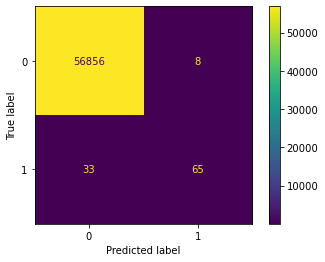

In [66]:
print(classification_report(y_test, lr_pred))
disp = ConfusionMatrixDisplay.from_estimator(lr, X_test,y_test)
plt.show();

In [20]:
baseline = 0.9983
lr.score(X_test, y_test) - baseline

0.0009802219023208325

While the accuracy scores are high, the baseline score is very high and the model only improves on the baseline by less than 0.001.
The model also incorrectly labels 33 fraudulent transactions as non - fraudulent, which is why the recall score for class 1 is at 0.66 (that is to say it only correctly identifies 66% of the fraudulent transactions).  The lower precision score for class 1 compared to class 0 is  because of the 73 predictions for label 1, 8 are incorrect.  
Better metrics to focus on would be the precision, recall and f1 scores for class 1 as this would indicate the ability to correctly predict fraudulent transfers.  
Also, including some sort of metric on time would be useful since slower models would have a negative effect on the speed of all other transfers.
What about other classifiers

Confusion matrix for LogisticRegression(max_iter=1000)


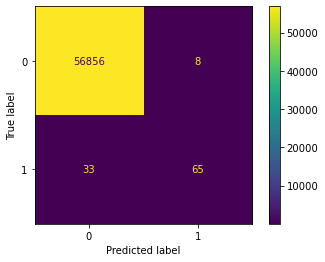

Confusion matrix for DecisionTreeClassifier()


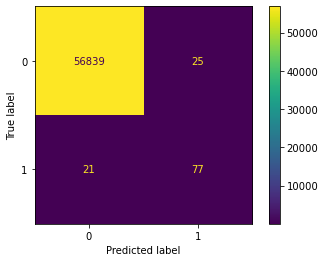

Confusion matrix for RandomForestClassifier()


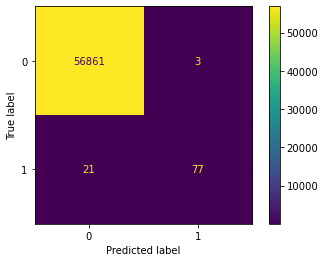

Confusion matrix for AdaBoostClassifier()


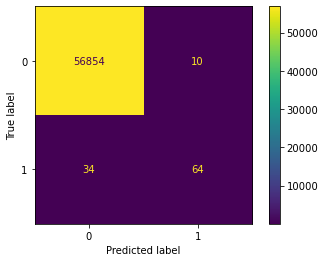

Confusion matrix for ExtraTreesClassifier()


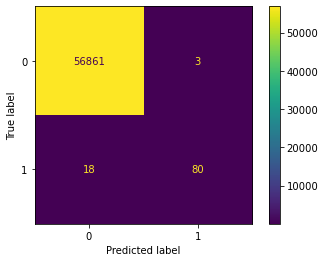

/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion matrix for KNeighborsClassifier()


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


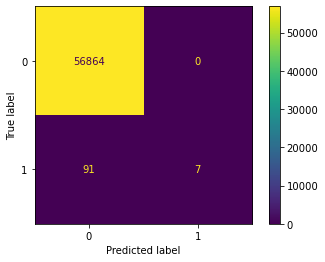

In [67]:
classifiers = [('LogReg' ,LogisticRegression(max_iter = 1000)), 
          ('Tree', DecisionTreeClassifier()), 
          ('Forest', RandomForestClassifier()), 
          ('Ada', AdaBoostClassifier()),
          ('ExtraTrees', ExtraTreesClassifier()), 
          ('KNN', KNeighborsClassifier())]
models = []
precision_scores = []
recall_scores = []
f1_scores = []
times = []
for name, model in classifiers:
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    y_pred = model.predict(X_test)
    models.append(name)
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    times.append(end - start)
    print(f"Confusion matrix for {model}")
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test,y_test)
    plt.show();
    
df_dict = {'model': models, 
           'fraud_precision' : precision_scores,
          'fraud_recall' : recall_scores,
           'f1': f1_scores,
          'train_time': times}

model_df = pd.DataFrame(df_dict)

In [68]:
model_df

,model,fraud_precision,fraud_recall,f1,train_time
0,LogReg,0.890411,0.663265,0.760234,3.984701
1,Tree,0.754902,0.785714,0.770000,13.874425
2,Forest,0.962500,0.785714,0.865169,129.229607
3,Ada,0.864865,0.653061,0.744186,39.699223
4,ExtraTrees,0.963855,0.816327,0.883978,9.189958
5,KNN,1.000000,0.071429,0.133333,0.006465


Reminder:

- Fraud Precision - How often (percentage) the model is correct when it predicts a transaction as fraud
- Recall - What percentage of the total fraudulent transactions did it correctly predict
- F1 - a combination of recall and precision actually calculated as (2 x recall x precision)/(recall + precision), but it can be thought of as the mean of the two, so this should be our primary metric


From this we can see that while the LogisticRegression model has a high precision for fraud, it has one of the lowest recalls.  Over 30% of the fraudulent transactions would not be correctly predicted.  That said it is the second fastest and it can still be tuned for improved performance

KNN, despite having the highest precision is the worst model as it's recal is lower than a snake's belly

While the Ada boost model has a good precision score, it has the second lowest (though not in the same league as KNN's) recall and is the second slowest.

RandForest scored highly on all but the train time and this could be an issue if that time slows down all the transactions as it tests.  It will also take a considerable amount of time to tune the model with gridsearch considering the training time of the original model.

The extra trees model has the highest f1 score and a relatively low training time, so it looks like the best model in this case.

We'll take the extra trees and logreg models and try to boost them to see if they improve their performance.

## Tuning the Logistic Regression model

In [73]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)

lr_params = {'penalty' : ['l1', 'l2', 'none'],
           'C': [1e-2, 1e-1, 1, 5, 10, 50],
           'fit_intercept' : [True, False],
           'solver' : ['lbfgs', 'sag','liblinear', 'newtonian']}

#instantiate gridseach cv
lr_grid = GridSearchCV(lr, lr_params, scoring = 'f1', n_jobs = 6, cv = 5, verbose = 1, return_train_score = True)

lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be ca

/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=6,
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 50],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'sag', 'liblinear', 'newtonian']},
             return_train_score=True, scoring='f1', verbose=1)

In [80]:
best_lr = lrGrid.best_estimator_
y_pred = best_lr.predict(X_test)
print("score of best, finely tuned model on training data was... ", best_lr.score(X_train, y_train))
print("the best parameter award goes to... ", lrGrid.best_params_)
print("score on the test data..", best_lr.score(X_test, y_test))
print(f"f1 score of best estimator was {f1_score(y_pred, y_test)}")

score of best, finely tuned model on training data was...  0.9991090434286467
the best parameter award goes to...  {'C': 0.1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'lbfgs'}
score on the test data.. 0.9990344440153085
f1 score of best estimator was 0.6820809248554913


In [84]:
extra = ExtraTreesClassifier()
extra.fit(X_train, y_train)

extra_params = {'n_estimators': [50, 100, 150, 200],
                 'criterion' : ['gini', 'entropy', 'log_loss'],
                 'max_features' : [0.2, 0.4, 0.6, 0.8, 1]}

extra_Grid = GridSearchCV(extra, extra_params, scoring = 'f1', n_jobs = 6, cv = 5, verbose = 0.1, return_train_score = True)

extra_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': [0.2, 0.4, 0.6, 0.8, 1],
                         'n_estimators': [50, 100, 150, 200]},
             return_train_score=True, scoring='f1', verbose=0.1)

In [85]:
best_extra = extra_Grid.best_estimator_
y_pred = best_extra.predict(X_test)
print("score of best, finely tuned model on training data was... ", best_extra.score(X_train, y_train))
print("the best parameter award goes to... ", extra_Grid.best_params_)
print("score on the test data..", best_extra.score(X_test, y_test))
print(f"f1 score of best estimator was {f1_score(y_pred, y_test)}")

score of best, finely tuned model on training data was...  1.0
the best parameter award goes to...  {'criterion': 'entropy', 'max_features': 0.8, 'n_estimators': 50}
score on the test data.. 0.9996313331694814
f1 score of best estimator was 0.8852459016393441
